In [1]:
import sys

sys.path.append('../GraphStructureLearning')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

from glob import glob
import pickle
import yaml
from easydict import EasyDict as edict

from torch_geometric.utils import to_dense_adj, dense_to_sparse

In [3]:
adj_matrix = np.load('./data/METR-LA/adj_mat.npy')

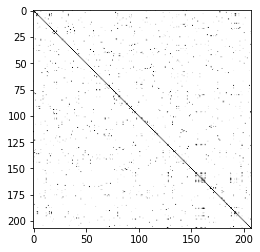

In [4]:
plt.imshow(adj_matrix, cmap='Greys')

In [12]:
from dataset.make_traffic_dataset import METRLADatasetLoader
from torch_geometric.loader import DataLoader


In [6]:
loader = METRLADatasetLoader(raw_data_dir='./data/METR-LA')

In [9]:
data_list = loader.get_dataset(12, 3)

In [10]:
data_list

[Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_index=[2, 1722], y=[207, 3]),
 Data(x=[207, 2, 12], edge_inde

In [11]:
len(data_list)

34258

In [13]:
loader = DataLoader(data_list, batch_size=32)

In [15]:
data = next(iter(loader))

In [24]:
data.edge_index

[array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 198, 206]]),
 array([[  0,   0,   0, ..., 206, 206, 206],
        [  0,  13,  37, ..., 187, 1

In [19]:
data.batch

tensor([ 0,  0,  0,  ..., 31, 31, 31])

In [20]:
data.x

tensor([[[ 0.5332,  0.4486,  0.5146,  ...,  0.4899,  0.5751,  0.4280],
         [-1.7292, -1.7171, -1.7051,  ..., -1.6207, -1.6087, -1.5966]],

        [[ 0.6940,  0.7400,  0.5022,  ...,  0.3909,  0.4981,  0.7002],
         [-1.7292, -1.7171, -1.7051,  ..., -1.6207, -1.6087, -1.5966]],

        [[ 0.6692,  0.5861,  0.3167,  ...,  0.4404,  0.5696,  0.6569],
         [-1.7292, -1.7171, -1.7051,  ..., -1.6207, -1.6087, -1.5966]],

        ...,

        [[ 0.5256,  0.4157, -0.1710,  ...,  0.0445, -0.6667, -0.4008],
         [-1.3556, -1.3436, -1.3315,  ..., -1.2472, -1.2351, -1.2231]],

        [[ 0.4047,  0.2397,  0.5994,  ...,  0.3476,  0.2115,  0.5579],
         [-1.3556, -1.3436, -1.3315,  ..., -1.2472, -1.2351, -1.2231]],

        [[ 0.4157,  0.2397,  0.1683,  ...,  0.4590,  0.2796,  0.2239],
         [-1.3556, -1.3436, -1.3315,  ..., -1.2472, -1.2351, -1.2231]]])

In [ ]:
exp_dirs = glob('./exp/METR_LA/*')
exp_dirs.sort()
exp_dirs

In [ ]:
exp = exp_dirs[0]

In [ ]:
config_file = glob(exp+'/*.yaml')[0]
config = edict(yaml.load(open(config_file, 'r'), Loader=yaml.FullLoader))

In [ ]:
train_result_dirs = glob(exp+'/training_result.pickle')
train_result = pickle.load(open(train_result_dirs[0], 'rb'))

test_result_dirs = glob(exp+'/test_result.pickle')
test_result = pickle.load(open(test_result_dirs[0], 'rb'))

In [ ]:
train_result.keys()

In [ ]:
test_result.keys()

In [ ]:
learn_adj = to_dense_adj(test_result['adj_matrix'].detach().cpu())
learn_edge_index = test_result['adj_matrix'].detach().cpu()

In [ ]:
plt.imshow(learn_adj[0], cmap='Greys')

In [ ]:
plt.plot(train_result['train_loss'], label='Train Loss')
plt.plot(train_result['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
len(test_result['target'])

In [ ]:
test_result['target'][0].shape

In [ ]:
targets = torch.stack(test_result['target'])
pred = torch.stack(test_result['prediction'])

In [ ]:
pred = torch.swapaxes(pred, 0, 1)
targets = torch.swapaxes(targets, 0, 1)

In [ ]:
pred.shape

In [ ]:
pred[0][0].shape

In [ ]:
pred[0, : ,0].shape

In [ ]:
nrow = 5
ncol = 2

f, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(5*nrow, 20*ncol), dpi=70)

for ii in range(nrow):
    for jj in range(ncol):
        axes[ii,jj].plot(targets[ii+jj, 2000:2000+100, 0], label='Target')
        axes[ii,jj].plot(pred[ii+jj, 3000:3000+100, 0], label='Prediction')
        axes[ii,jj].legend()